   Episode    Reward  Length  TotalSteps
0        0  4.144878       5           6
1        1  7.488135       8          14
2        2  3.773012       5          19
3        3  5.180652       6          25
4        4  2.555513       3          28


/tmp/ipykernel_3140/826268471.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


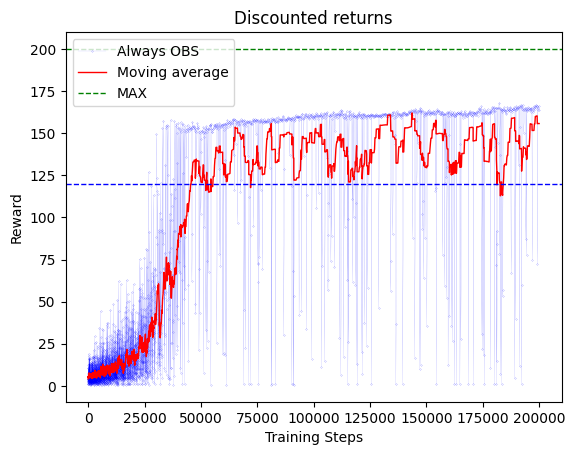

In [5]:
import pandas as pd
episode_df = pd.read_csv("logdir/MBRLCartpole-v0_200000__2023_06_18_18_56_rw1_with_cost.csv")

print(episode_df.head())

import matplotlib.pyplot as plt

METRIC = "Reward"
ROLLING_WINDOW = 20
FROM = 0
UNTIL = 200000
BEST_RESULTS_NO_OBS_COST = 200
ALWAYS_OBS = BEST_RESULTS_NO_OBS_COST*0.6

metrics_df_no_na = episode_df.dropna(how='any', subset=[METRIC, 'TotalSteps'])

# Filter the DataFrame for TotalSteps > FROM and TotalSteps < UNTIL
filtered_df = metrics_df_no_na[(metrics_df_no_na['TotalSteps'] > FROM) & (metrics_df_no_na['TotalSteps'] < UNTIL)]

# Calculate the moving average using a window size of ROLLING_WINDOW
filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(filtered_df['TotalSteps'], filtered_df[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(filtered_df['TotalSteps'], filtered_df['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axhline(y=BEST_RESULTS_NO_OBS_COST, color='g', linestyle='--', linewidth=1)
plt.axhline(y=ALWAYS_OBS, color='b', linestyle='--', linewidth=1)

plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title('Discounted returns')
plt.legend(['Always OBS', 'Moving average', 'MAX'])
plt.show()


In [3]:
episode_df

,Episode,Reward,Length,TotalSteps
0,0,4.0,4,5
1,1,6.2,7,12
2,2,5.0,5,17
3,3,1.0,1,18
4,4,4.6,5,23
...,...,...,...,...
2261,2261,108.6,133,198222
2262,2262,226.0,274,198496
2263,2263,562.6,681,199177
2264,2264,658.8,796,199973


In [12]:
# plot this fucntion: 
import numpy as np

# define coord as set of point on a circle with radius 0.6
theta = np.linspace(0, np.pi, 100)
# 2d array of cos and sin of theta e,g, [[cos(theta1), sin(theta1)], [cos(theta2), sin(theta2)], ...]
coord = np.array([np.cos(theta), np.sin(theta)]).T
# copy np.array([0.0, 0.6]) 100 times in another dimension
coord

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.99496542e-01,  3.17279335e-02],
       [ 9.97986676e-01,  6.34239197e-02],
       [ 9.95471923e-01,  9.50560433e-02],
       [ 9.91954813e-01,  1.26592454e-01],
       [ 9.87438889e-01,  1.58001396e-01],
       [ 9.81928697e-01,  1.89251244e-01],
       [ 9.75429787e-01,  2.20310533e-01],
       [ 9.67948701e-01,  2.51147987e-01],
       [ 9.59492974e-01,  2.81732557e-01],
       [ 9.50071118e-01,  3.12033446e-01],
       [ 9.39692621e-01,  3.42020143e-01],
       [ 9.28367933e-01,  3.71662456e-01],
       [ 9.16108457e-01,  4.00930535e-01],
       [ 9.02926538e-01,  4.29794912e-01],
       [ 8.88835449e-01,  4.58226522e-01],
       [ 8.73849377e-01,  4.86196736e-01],
       [ 8.57983413e-01,  5.13677392e-01],
       [ 8.41253533e-01,  5.40640817e-01],
       [ 8.23676581e-01,  5.67059864e-01],
       [ 8.05270258e-01,  5.92907929e-01],
       [ 7.86053095e-01,  6.18158986e-01],
       [ 7.66044443e-01,  6.42787610e-01],
       [ 7.

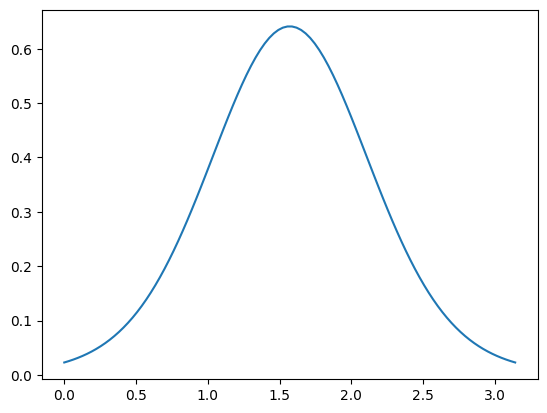

In [17]:
y = [np.exp(-np.sum(np.square([sin, cos] - np.array([0.0, 0.6]))) / (0.6 ** 2)) for sin, cos in coord]
y

plt.plot(theta, y)

In [20]:
max(y)*300

192.27342659092972